In [58]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import random

KeyboardInterrupt: 


KeyboardInterrupt



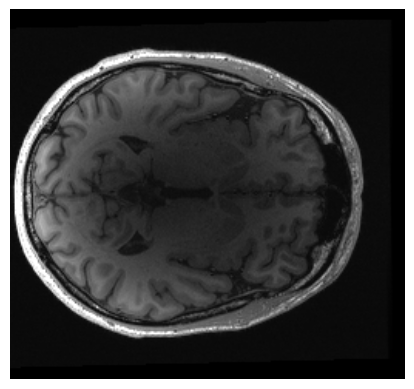

In [54]:

# Carica volume
vol = nib.load("D:\\StefanoTesiMagistrale\\DatasetStefano\\Dataset\\ANAT\\TrainANii\\sub-02_ses-Y3MRP_run-2_T1w_defaced.nii").get_fdata()

# Seleziona la slice

for i in range(104,230):   
    slice_index = i
    slice_data = vol[:, :, slice_index]

    # Clipping tra 1° e 99° percentile
    v_min, v_max = np.percentile(slice_data, (1, 99))
    clipped = np.clip(slice_data, v_min, v_max)

    # Normalizzazione tra 0 e 1
    normalized = (clipped - v_min) / (v_max - v_min)
    
    # Visualizza e salva
    plt.imshow(normalized, cmap='gray')
    plt.imshow(normalized, cmap='gray', interpolation='bilinear')
    plt.axis('off')  # Rimuove gli assi se vuoi salvarla pulita
    
    plt.savefig("D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TrainA\immagine_salvata"+ str(i) + ".png", bbox_inches='tight', pad_inches=0)


In [60]:

# Percorsi dove si trova il dataset dei file .nii
input_folder = r"D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TrainANii"
output_folder = r"D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TrainA"


# Scorri tutti i file .nii o .nii.gz
for filename in os.listdir(input_folder):
    if filename.endswith(".nii"):
        filepath = os.path.join(input_folder, filename)
        print(f"Processing {filename}...")

        # Carica il volume
        vol = nib.load(filepath).get_fdata()

        # Per ogni slice selezionata
        for i in range(104, 200):
            if i >= vol.shape[2]:  # Evita slice out-of-bounds
                continue

            slice_data = vol[:, :, i]

            # Clipping + normalizzazione
            v_min, v_max = np.percentile(slice_data, (1, 99))
            clipped = np.clip(slice_data, v_min, v_max)
            normalized = (clipped - v_min) / (v_max - v_min)

            # Salva la slice
            plt.figure(figsize=(5, 5), dpi=150)
            plt.imshow(normalized, cmap='gray', interpolation='bilinear')
            plt.axis('off')

            # Nome immagine output
            base_name = os.path.splitext(filename)[0].replace('.nii', '')
            output_path = os.path.join(output_folder, f"{base_name}_slice{i}.png")

            plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
            plt.close()  # Libera memoria figura

print("✅ Completato!")


Processing sub-02_ses-Y3CMH_run-1_T1w_defaced.nii...
ERROR! Session/line number was not unique in database. History logging moved to new session 315
Processing sub-02_ses-Y3MRP_run-2_T1w_defaced.nii...
Processing sub-02_ses-Y3MRP_run-3_T1w_defaced.nii...
Processing sub-02_ses-Y3ZHP_run-1_T1w_defaced.nii...
Processing sub-02_ses-Y4CMP_run-1_T1w_defaced.nii...
Processing sub-03_ses-Y1MRC_run-1_T1w_defaced.nii...
Processing sub-03_ses-Y1MRC_run-2_T1w_defaced.nii...
Processing sub-03_ses-Y1MRC_run-3_T1w_defaced.nii...
Processing sub-03_ses-Y1MRC_run-4_T1w_defaced.nii...
Processing sub-03_ses-Y1ZHH_run-1_T1w_defaced.nii...
Processing sub-03_ses-Y2CMH_run-1_T1w_defaced.nii...
Processing sub-03_ses-Y2MRC_run-1_T1w_defaced.nii...
Processing sub-03_ses-Y2MRC_run-2_T1w_defaced.nii...
Processing sub-03_ses-Y2ZHH_run-1_T1w_defaced.nii...
Processing sub-03_ses-Y3CMH_run-1_T1w_defaced.nii...
Processing sub-03_ses-Y3MRP_run-1_T1w_defaced.nii...
Processing sub-03_ses-Y3MRP_run-2_T1w_defaced.nii...
Pro

In [62]:
folders = {
    "TrainA": r"D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TrainA",
    "TrainB": r"D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TrainB",
    "TestA":  r"D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TestA",
    "TestB":  r"D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TestB"
}

for name, path in folders.items():
    count = len([f for f in os.listdir(path) if f.lower().endswith('.png')])
    print(f"{name}: {count} immagini PNG")

TrainA: 1536 immagini PNG
TrainB: 1767 immagini PNG
TestA: 384 immagini PNG
TestB: 441 immagini PNG


In [61]:


# Cartelle originali
trainA_folder = r"D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TrainA"
trainB_folder = r"D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TrainB"

# Cartelle di destinazione
testA_folder = r"D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TestA"
testB_folder = r"D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TestB"

def move_percentage_of_files(src_folder, dst_folder, percentage):
    files = [f for f in os.listdir(src_folder) if f.lower().endswith('.png')]
    random.shuffle(files)
    n_to_move = int(len(files) * percentage)

    for file in files[:n_to_move]:
        src_path = os.path.join(src_folder, file)
        dst_path = os.path.join(dst_folder, file)
        shutil.move(src_path, dst_path)

    print(f"✅ Spostati {n_to_move} file da {src_folder} a {dst_folder}")

# Sposta il 20%
move_percentage_of_files(trainA_folder, testA_folder, 0.2)
#move_percentage_of_files(trainB_folder, testB_folder, 0.2)

print("✅ Operazione completata!")


✅ Spostati 384 file da D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TrainA a D:\StefanoTesiMagistrale\DatasetStefano\Dataset\ANAT\TestA
✅ Operazione completata!
